<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%config InlineBackend.figure_format='retina'

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



Intercept Value: [-55003.50542459]
Slope Coefficient: [287.35628566]
RMSE: 248908.96
R^2: 0.45


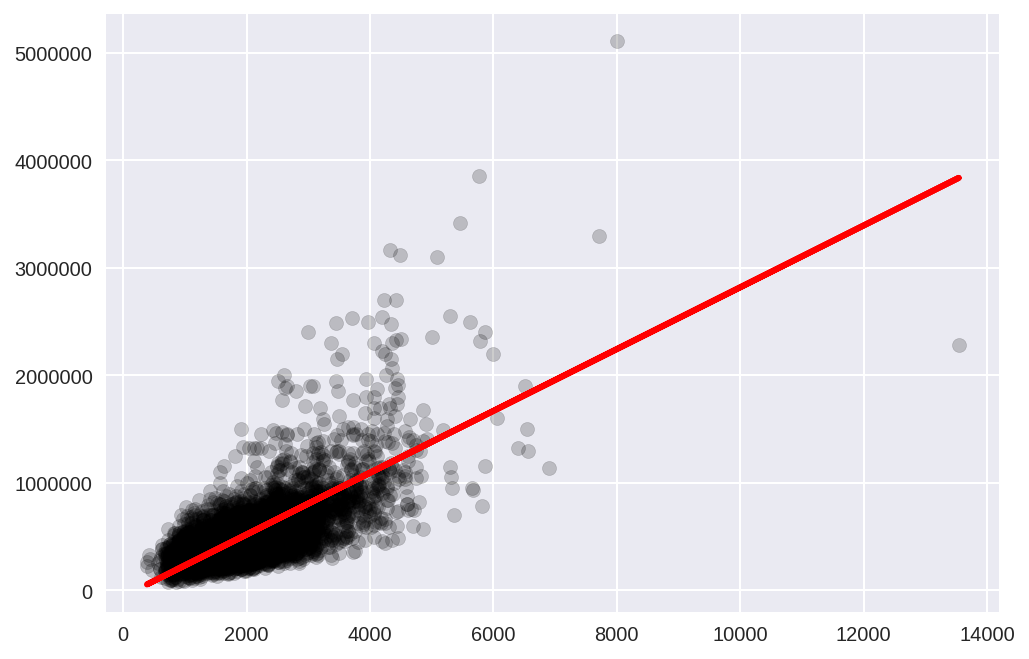

In [93]:
# Let's predict price from sqft_living
X = df[['sqft_living']]
y = df[['price']]

# Split data 50/50 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Train the model using the training sets
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Plot the points on a graph and fit the line of best fit to the graph
plt.scatter(X_test, y_test,  color='black', alpha=0.2)
plt.plot(X_test, y_pred, color='red', linewidth=3)


# Intercept value
print("\nIntercept Value:", model.intercept_)

# The slope coefficient
print("Slope Coefficient:", model.coef_[0])

# Root mean squared error
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred)**0.5)

# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test, y_pred))

The accuracy of predictions (mean squared error) of our model is the most imporant thing we care about. R^2 is a close second, it's a nice to have but nearly as important.

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [94]:
# Change X
X = df[['sqft_living', 'yr_built']]
y = df[['price']]

# Split data 50/50 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# Train the model using the training sets
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Intercept value
print("\nIntercept Value:", model.intercept_)

# The slope coefficient
print("Slope Coefficients:", model.coef_[0])

# Root mean squared error
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred)**0.5)

# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test, y_pred))


Intercept Value: [4460241.89865086]
Slope Coefficient: [  298.10062962 -2303.31647821]
RMSE: 256135.52
R^2: 0.53


3-D Plot showing plane of best fit:

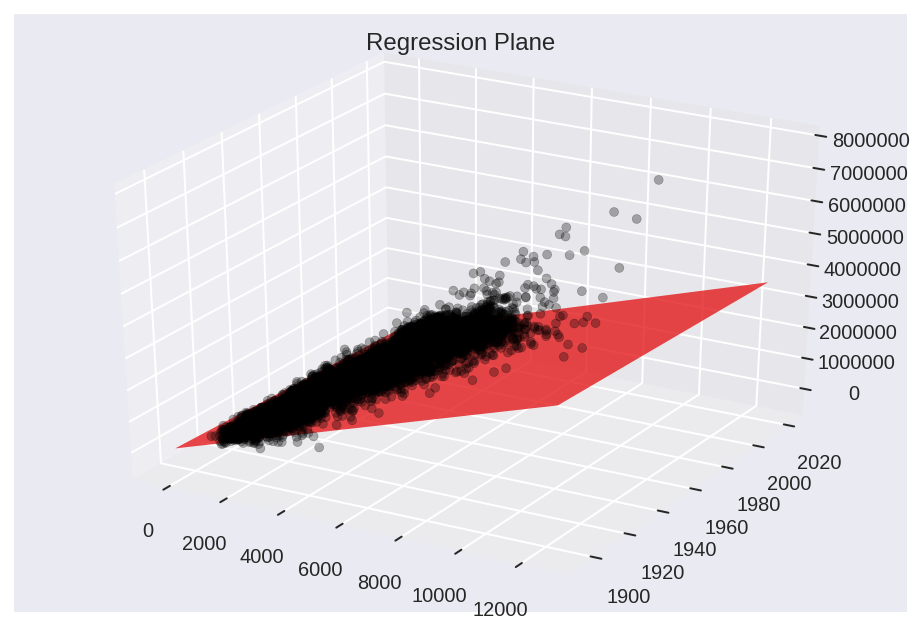

In [98]:
beta_i = model.coef_[0]
beta_0 = model.intercept_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(X_test['sqft_living'], X_test['yr_built'], y_test ,c='black', alpha=0.3)

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.8, cmap='Set1')
plt.title("Regression Plane")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [103]:
# All available features other than ids & date & y
X = df.iloc[:,3:]
y = df[['price']]

# Split data 50/50 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# Train the model using the training sets
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Intercept value
print("\nIntercept Value:", model.intercept_)

# The slope coefficient
print("Slope Coefficients:", model.coef_[0])

# Root mean squared error
print("RMSE: %.2f" % mean_squared_error(y_test, y_pred)**0.5)

# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test, y_pred))


Intercept Value: [7100030.82431928]
Slope Coefficients: [-3.59816247e+04  3.76446865e+04  1.12842673e+02  7.44850224e-02
 -5.20361173e+02  5.75069420e+05  5.61611343e+04  2.24612364e+04
  9.69426465e+04  7.32175145e+01  3.96251583e+01 -2.53979891e+03
  2.85669713e+01 -5.79479347e+02  6.17504395e+05 -2.02198194e+05
  1.54937592e+01 -5.05078280e-01]
RMSE: 203246.08
R^2: 0.69


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
